In [56]:
# EJECUTAR EN CASO DE QUE NO TENGA LA LIBRERIA

!pip install matplotlib-venn

     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.3 kB 640.0 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/40.3 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 273.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45338 sha256=986a7aaedc4e3355dbc1eaa7373357af369dee27c03bc97ec5d64c804ab033e8
  Stored in directory: c:\users\ignac\appdata\local\pip\cache\wheels\8a\29\52\4d90d9556445079f88255b87a75d951357eff52d0795b88f4f
Successfully built matplotlib-venn


In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os

In [5]:
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

In [6]:
#info que muestre todos los datos 
chile_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no  

In [7]:
argentina_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [8]:
antartica_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

Como grupo fuimos viendo manualmente que columnas nos servirian para poder responder las preguntas planteadas en la propuesta inicial, y llegamos a un concenso de elegir las siguientes 19 columnas como base para poder responder estas.

In [10]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'early_interval',
    'late_interval',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'life_habit',
    "environment",
    "taxon_environment",
    "primary_name"
]

#Hacer que los df solo tengan las columnas que necesitamos
chile_df = chile_df[columns].copy()
argentina_df = argentina_df[columns].copy()
antartica_df = antartica_df[columns].copy()

In [11]:
chile_df

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name
0,ceciliana,16417,Leionucula,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula
1,amuriensis,16418,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
2,cuneiformis,16419,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
3,levitestata,16420,Yoldia,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia
4,pencana,16421,Neiloides,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,infaunal,NaN,NaN,Neiloides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,sp.,1659402,Ostrea,Turonian,Campanian,Mollusca,Bivalvia,Ostreida,Ostreidae,Ostrea,-50.884998,-72.625000,suspension feeder,epifaunal,basinal (siliciclastic),"hypersaline,marine,brackish",Ostrea
9477,antarctica,1659403,Cucullaea antarctica,Turonian,Campanian,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-50.884998,-72.625000,suspension feeder,infaunal,basinal (siliciclastic),NaN,Cucullaea
9478,sp.,1659404,Nucula,Turonian,Campanian,Mollusca,Bivalvia,Nuculida,Nuculidae,Nucula,-50.884998,-72.625000,"deposit feeder, suspension feeder",infaunal,basinal (siliciclastic),"coastal,inner shelf,outer shelf,oceanic",Nucula
9479,saladensis,1660104,Micrauchenia saladensis,Tortonian,Messinian,Chordata,Mammalia,Panameriungulata,Macraucheniidae,Micrauchenia,-27.684723,-70.949997,herbivore,scansorial,coastal indet.,terrestrial,Micrauchenia


In [12]:
obtener_duplicados_chile = chile_df.duplicated(keep=False)
datos_duplicados_chile = chile_df[obtener_duplicados_chile]
datos_duplicados_chile

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [13]:
obtener_duplicados_argentina = chile_df.duplicated(keep=False)
datos_duplicados_argentina = chile_df[obtener_duplicados_argentina]
datos_duplicados_argentina

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [14]:
obtener_duplicados_antartica = antartica_df.duplicated(keep=False)
datos_duplicados_antartica = antartica_df[obtener_duplicados_antartica]
datos_duplicados_antartica

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


Notamos que no hay datos duplicados, por ende no es necesario realizar ninguna acción adicional para eliminar duplicados.

In [16]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [17]:
argentina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       31881 non-null  object 
 1   occurrence_no      31881 non-null  int64  
 2   accepted_name      31253 non-null  object 
 3   early_interval     31881 non-null  object 
 4   late_interval      5288 non-null   object 
 5   phylum             31226 non-null  object 
 6   class              31038 non-null  object 
 7   order              29738 non-null  object 
 8   family             29056 non-null  object 
 9   genus              27398 non-null  object 
 10  lat                31881 non-null  float64
 11  lng                31881 non-null  float64
 12  diet               24717 non-null  object 
 13  life_habit         22808 non-null  object 
 14  environment        31192 non-null  object 
 15  taxon_environment  18471 non-null  object 
 16  primary_name       318

In [18]:
antartica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       11311 non-null  object 
 1   occurrence_no      11311 non-null  int64  
 2   accepted_name      10977 non-null  object 
 3   early_interval     11311 non-null  object 
 4   late_interval      2888 non-null   object 
 5   phylum             10960 non-null  object 
 6   class              10926 non-null  object 
 7   order              10744 non-null  object 
 8   family             10604 non-null  object 
 9   genus              10375 non-null  object 
 10  lat                11311 non-null  float64
 11  lng                11311 non-null  float64
 12  diet               7706 non-null   object 
 13  life_habit         6012 non-null   object 
 14  environment        10351 non-null  object 
 15  taxon_environment  5410 non-null   object 
 16  primary_name       113

In [19]:
chile_df['era_early'] = None
argentina_df['era_early'] = None
antartica_df['era_early'] = None

In [20]:
chile_df['era_late'] = None
argentina_df['era_late'] = None
antartica_df['era_late'] = None

In [21]:
cambrian_intervals = [
    "Early Terreneuvian", "Middle Terreneuvian", "Late Terreneuvian", "Terreneuvian",
    "Early Series 2", "Middle Series 2", "Late Series 2", "Series 2",
    "Early Miaolingian", "Middle Miaolingian", "Late Miaolingian", "Miaolingian",
    "Early Furongian", "Middle Furongian", "Late Furongian", "Furongian",
    "Early Fortunian", "Middle Fortunian", "Late Fortunian", "Fortunian",
    "Early Stage 2", "Middle Stage 2", "Late Stage 2", "Stage 2",
    "Early Stage 3", "Middle Stage 3", "Late Stage 3", "Stage 3",
    "Early Stage 4", "Middle Stage 4", "Late Stage 4", "Stage 4",
    "Early Wuliuan", "Middle Wuliuan", "Late Wuliuan", "Wuliuan",
    "Early Drumian", "Middle Drumian", "Late Drumian", "Drumian",
    "Early Guzhangian", "Middle Guzhangian", "Late Guzhangian", "Guzhangian",
    "Early Paibian", "Middle Paibian", "Late Paibian", "Paibian",
    "Early Jiangshanian", "Middle Jiangshanian", "Late Jiangshanian", "Jiangshanian",
    "Early Stage 10", "Middle Stage 10", "Late Stage 10", "Stage 10","Middle Cambrian", "Atdabanian",
    "Toyonian", "Botomian", "Early Cambrian", 'Floran', 'Lenian', 'Dresbachian',
    'Dolgellian', 'Merioneth', 'Trempealeauan', 'Idamean',
       'Sunwaptan','St Davids', 'Solvan', 'Dyeran', 'Wonokan',
        'Tulean', 'Blackhillsian'

]


silurian_intervals = [
    "Early Rhuddanian", "Middle Rhuddanian", "Late Rhuddanian", "Rhuddanian",
    "Early Aeronian", "Middle Aeronian", "Late Aeronian", "Aeronian",
    "Early Telychian", "Middle Telychian", "Late Telychian", "Telychian",
    "Early Sheinwoodian", "Middle Sheinwoodian", "Late Sheinwoodian", "Sheinwoodian",
    "Early Homerian", "Middle Homerian", "Late Homerian", "Homerian",
    "Early Gorstian", "Middle Gorstian", "Late Gorstian", "Gorstian",
    "Early Ludfordian", "Middle Ludfordian", "Late Ludfordian", "Ludfordian",
    "Early Llandovery", "Middle Llandovery", "Late Llandovery", "Llandovery",
    "Early Wenlock", "Middle Wenlock", "Late Wenlock", "Wenlock",
    "Early Ludlow", "Middle Ludlow", "Late Ludlow", "Ludlow",
    "Early Pridoli", "Middle Pridoli", "Late Pridoli", "Pridoli"
]


devonian_intervals = [
    "Early Lochkovian", "Middle Lochkovian", "Late Lochkovian", "Lochkovian",
    "Early Pragian", "Middle Pragian", "Late Pragian", "Pragian",
    "Early Emsian", "Middle Emsian", "Late Emsian", "Emsian",
    "Early Eifelian", "Middle Eifelian", "Late Eifelian", "Eifelian",
    "Early Givetian", "Middle Givetian", "Late Givetian", "Givetian",
    "Early Fransnian", "Middle Fransnian", "Late Fransnian", "Fransnian",
    "Early Famennian", "Middle Famennian", "Late Famennian", "Famennian",
    "Early Devonian", "Middle Devonian", "Late Devonian"
]


carboniferous_intervals = [
    "Early Tournaisian", "Middle Tournaisian", "Late Tournaisian", "Tournaisian",
    "Early Visean", "Middle Visean", "Late Visean", "Visean",
    "Early Serpukhovian", "Middle Serpukhovian", "Late Serpukhovian", "Serpukhovian",
    "Early Bashkirian", "Middle Bashkirian", "Late Bashkirian", "Bashkirian",
    "Early Moscovian", "Middle Moscovian", "Late Moscovian", "Moscovian",
    "Early Kasimovian", "Middle Kasimovian", "Late Kasimovian", "Kasimovian",
    "Early Gzhelian", "Middle Gzhelian", "Late Gzhelian", "Gzhelian",
    "Early Mississippian", "Middle Mississippian", "Late Mississippian", "Mississippian",
    "Early Pennsylvanian", "Middle Pennsylvanian", "Late Pennsylvanian", "Pennsylvanian",
    'Namurian', 'Virgilian', "Arnsbergian", 
]

permian_intervals = [
    "Early Asselian", "Middle Asselian", "Late Asselian", "Asselian",
    "Early Sakmarian", "Middle Sakmarian", "Late Sakmarian", "Sakmarian",
    "Early Artinskian", "Middle Artinskian", "Late Artinskian", "Artinskian",
    "Early Kungurian", "Middle Kungurian", "Late Kungurian", "Kungurian",
    "Early Roadian", "Middle Roadian", "Late Roadian", "Roadian",
    "Early Wordian", "Middle Wordian", "Late Wordian", "Wordian",
    "Early Capitanian", "Middle Capitanian", "Late Capitanian", "Capitanian",
    "Early Wuchiapingian", "Middle Wuchiapingian", "Late Wuchiapingian", "Wuchiapingian",
    "Early Changhsingian", "Middle Changhsingian", "Late Changhsingian", "Changhsingian",
    "Early Cisuralian", "Middle Cisuralian", "Late Cisuralian", "Cisuralian",
    "Early Guadalupian", "Middle Guadalupian", "Late Guadalupian", "Guadalupian",
    "Early Lopingian", "Middle Lopingian", "Late Lopingian", "Lopingian"
]


ordovician_intervals = [
    "Early Ordovician", "Middle Ordovician", "Late Ordovician",
    "Early Tremadocian", "Middle Tremadocian", "Late Tremadocian", "Tremadocian",
    "Early Floian", "Middle Floian", "Late Floian", "Floian",
    "Early Dapingian", "Middle Dapingian", "Late Dapingian", "Dapingian",
    "Early Darriwilian", "Middle Darriwilian", "Late Darriwilian", "Darriwilian",
    "Early Sandbian", "Middle Sandbian", "Late Sandbian", "Sandbian",
    "Early Katian", "Middle Katian", "Late Katian", "Katian",
    "Early Hirnantian", "Middle Hirnantian", "Late Hirnantian", "Hirnantian",
    'Arenig', 'Early Llanvirn', 'Ibex', 'Tremadoc', 'Llanvirn', 'Gisbornian',
    'Caradoc', 'Early Llandeilo','Costonian', 'Actonian', 'Late Llandeilo',
    'Longvillian', 'Llandeilo', 'Arenigian', 'Late Llanvirn', 'Whiterockian',
    'Skullrockian', 'Stairsian'
]

triassic_intervals = [
    "Early Induan", "Middle Induan", "Late Induan", "Induan",
    "Early Anisian", "Middle Anisian", "Late Anisian", "Anisian",
    "Early Ladinian", "Middle Ladinian", "Late Ladinian", "Ladinian",
    "Early Carnian", "Middle Carnian", "Late Carnian", "Carnian",
    "Early Norian", "Middle Norian", "Late Norian", "Norian",
    "Early Rhaetian", "Middle Rhaetian", "Late Rhaetian", "Rhaetian",
    "Early Triassic", "Middle Triassic", "Late Triassic", 'Sevatian',
    'Olenekian', 'Longobardian'
]


neogene_intervals = [
    "Early Miocene", "Middle Miocene", "Late Miocene", "Miocene",
    "Early Pliocene", "Middle Pliocene", "Late Pliocene", "Pliocene",
    "Early Aquitanian", "Middle Aquitanian", "Late Aquitanian", "Aquitanian",
    "Early Burdigalian", "Middle Burdigalian", "Late Burdigalian", "Burdigalian",
    "Early Langhian", "Middle Langhian", "Late Langhian", "Langhian",
    "Early Serrevallian", "Middle Serrevallian", "Late Serrevallian", "Serrevallian",
    "Early Tortonian", "Middle Tortonian", "Late Tortonian", "Tortonian",
    "Early Messinian", "Middle Messinian", "Late Messinian", "Messinian",
    "Early Zanclean", "Middle Zanclean", "Late Zanclean", "Zanclean",
    "Early Piacenzian", "Middle Piacenzian", "Late Piacenzian", "Piacenzian",
    'Serravallian', 'Colhuehuapian', 'Santacrucian','Friasian',
    'Chasicoan', 'Montehermosan', 'Huayquerian', 'Chapadmalalan',
    'Colloncuran', 'Mayoan'
]


quaternary_intervals = [
    "Early Pleistocene", "Middle Pleistocene", "Late Pleistocene", "Pleistocene",
    "Early Gelasian", "Middle Gelasian", "Late Gelasian", "Gelasian",
    "Early Calabrian", "Middle Calabrian", "Late Calabrian", "Calabrian",
    "Early Chibanian", "Middle Chibanian", "Late Chibanian", "Chibanian",
    'Holocene', 'Lujanian', 'Ensenadan', 'Ionian', 'Uquian'
]


jurassic_intervals = [
    "Early Hettangian", "Middle Hettangian", "Late Hettangian", "Hettangian",
    "Early Sinemurian", "Middle Sinemurian", "Late Sinemurian", "Sinemurian",
    "Early Pliensbachian", "Middle Pliensbachian", "Late Pliensbachian", "Pliensbachian",
    "Early Toarcian", "Middle Toarcian", "Late Toarcian", "Toarcian",
    "Early Aalenian", "Middle Aalenian", "Late Aalenian", "Aalenian",
    "Early Bajocian", "Middle Bajocian", "Late Bajocian", "Bajocian",
    "Early Bathonian", "Middle Bathonian", "Late Bathonian", "Bathonian",
    "Early Callovian", "Middle Callovian", "Late Callovian", "Callovian",
    "Early Oxfordian", "Middle Oxfordian", "Late Oxfordian", "Oxfordian",
    "Early Kimmeridgian", "Middle Kimmeridgian", "Late Kimmeridgian", "Kimmeridgian",
    "Early Tithonian", "Middle Tithonian", "Late Tithonian", "Tithonian",
    "Early Jurassic", "Middle Jurassic", "Late Jurassic", 'Planorbis',
    'Margaritatus', 'Variabilis', 'Opalinum','Angulata', 'Obtusum',
    'Falciferum', 'Bifrons', 'Murchisonae', 'Jamesoni', 'Spinatum',
    'Davoei', 'Liasicus', 'Bucklandi', 'Concavum'
]


paleogene_intervals = [
    "Early Paleocene", "Middle Paleocene", "Late Paleocene", "Paleocene",
    "Early Eocene", "Middle Eocene", "Late Eocene", "Eocene",
    "Early Oligocene", "Middle Oligocene", "Late Oligocene", "Oligocene",
    "Early Danian", "Middle Danian", "Late Danian", "Danian",
    "Early Selandian", "Middle Selandian", "Late Selandian", "Selandian",
    "Early Thanetian", "Middle Thanetian", "Late Thanetian", "Thanetian",
    "Early Ypresian", "Middle Ypresian", "Late Ypresian", "Ypresian",
    "Early Lutetian", "Middle Lutetian", "Late Lutetian", "Lutetian",
    "Early Bartonian", "Middle Bartonian", "Late Bartonian", "Bartonian",
    "Early Priabonian", "Middle Priabonian", "Late Priabonian", "Priabonian",
    "Early Rupelian", "Middle Rupelian", "Late Rupelian", "Rupelian",
    "Early Chattian", "Middle Chattian", "Late Chattian", "Chattian",
    'Casamayoran', 'Tinguirirican', 'Riochican', 'Deseadan', 'Mustersan',
    'Divisaderan'
]

cretaceous_intervals = [
    "Early Berriasian", "Middle Berriasian", "Late Berriasian", "Berriasian",
    "Early Valanginian", "Middle Valanginian", "Late Valanginian", "Valanginian",
    "Early Hauterivian", "Middle Hauterivian", "Late Hauterivian", "Hauterivian",
    "Early Barremian", "Middle Barremian", "Late Barremian", "Barremian",
    "Early Aptian", "Middle Aptian", "Late Aptian", "Aptian",
    "Early Albian", "Middle Albian", "Late Albian", "Albian",
    "Early Cenomanian", "Middle Cenomanian", "Late Cenomanian", "Cenomanian",
    "Early Turonian", "Middle Turonian", "Late Turonian", "Turonian",
    "Early Coniacian", "Middle Coniacian", "Late Coniacian", "Coniacian",
    "Early Santonian", "Middle Santonian", "Late Santonian", "Santonian",
    "Early Campanian", "Middle Campanian", "Late Campanian", "Campanian",
    "Early Maastrichtian", "Middle Maastrichtian", "Late Maastrichtian", "Maastrichtian",
    "Early Cretaceous", "Late Cretaceous", 'Neocomian','Senonian'
]

ediacaran_intervals = ["Ediacaran"]

cryogenian_intervals = ["Cryogenian"]

tonian_intervals = ["Tonian"]

siderian_intervals = ["Siderian"]
rhyacian_intervals = ["Rhyacian"]
orosirian_intervals = ["Orosirian"]
statherian_intervals = ["Statherian"]
calymmian_intervals = ["Calymmian"]
ectasian_intervals = ["Ectasian"]
stenian_intervals = ["Stenian"]

nan = [np.nan]

In [22]:
def assign_era(row):
    if row['early_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['early_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['early_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['early_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['early_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['early_interval'] in permian_intervals:
        return 'Permian'
    elif row['early_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['early_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['early_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['early_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['early_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['early_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['early_interval'] in nan:
        return "No especificado"
    else:
        return row['early_interval']

In [23]:
def assign_era_late(row):
    if row['late_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['late_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['late_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['late_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['late_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['late_interval'] in permian_intervals:
        return 'Permian'
    elif row['late_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['late_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['late_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['late_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['late_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['late_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['late_interval'] in nan:
        return "No especificado"
    else:
        return row['late_interval']

In [24]:
chile_df['era_early'] = chile_df.apply(assign_era, axis=1)
argentina_df['era_early'] = argentina_df.apply(assign_era, axis=1)
antartica_df['era_early'] = antartica_df.apply(assign_era, axis=1)

In [26]:
chile_df['era_late'] = chile_df.apply(assign_era_late, axis=1)
argentina_df['era_late'] = argentina_df.apply(assign_era_late, axis=1)
antartica_df['era_late'] = antartica_df.apply(assign_era_late, axis=1)

In [27]:
chile_df.drop(columns=['late_interval', 'early_interval'], inplace=True)
argentina_df.drop(columns=['late_interval', 'early_interval'], inplace=True)
antartica_df.drop(columns=['late_interval', 'early_interval'], inplace=True)


In [28]:
chile_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.0,-73.0,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.0,-73.0,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado


In [29]:
argentina_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,sp.,17744,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-39.0,-69.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
1,rocana,17745,Cucullaea,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-39.0,-69.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado
2,feruglioli,17746,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
3,sp.,17747,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
4,mechanquilensis,17748,Inoceramus,Mollusca,Bivalvia,Myalinida,Inoceramidae,Inoceramus,-39.0,-69.0,suspension feeder,epifaunal,NaN,NaN,Inoceramus,Cretaceous,No especificado


# ¿Existen similitudes en la distribución de especies fósiles entre las costas de Chile y Argentina durante perídos geológicos específicos?

## **Enfoque y Objetivo**

En este análisis, buscamos explorar la biodiversidad fósil en las costas de Chile y Argentina, centrándonos en las similitudes y diferencias en la distribución de especies fósiles durante diferentes eras geológicas.  

Para ello, adoptamos un enfoque estructurado que incluye:  
1. **Filtrar datos fósiles costeros** para eliminar información irrelevante de zonas continentales.  
2. **Estudiar la diversidad fósil** en términos de riqueza y similitud entre especies por eras geológicas.  
3. **Aplicar índices de similitud**, como el índice de Jaccard, para medir la relación entre las especies compartidas y únicas de cada región.  

Este enfoque nos permitirá:  
- Cuantificar la similitud entre ambas regiones costeras utilizando un método riguroso.  
- Contextualizar los resultados en un marco geológico e histórico para entender los factores detrás de las diferencias observadas.  

---

## **Índice de Jaccard: Fundamentación y Uso**

El índice de Jaccard es una métrica utilizada para evaluar la similitud entre dos conjuntos, considerando las especies compartidas y las únicas. Se define como:  

\[
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
\]

Donde:  
- \( |A \cap B| \): Número de especies comunes entre las costas de Chile y Argentina.  
- \( |A \cup B| \): Número total de especies únicas combinadas en ambas costas.  

### **Interpretación del Índice de Jaccard**
- **Valores cercanos a 0**: Baja similitud; pocas especies compartidas.  
- **Valores cercanos a 1**: Alta similitud; muchas especies compartidas.  

**¿Por qué usar el índice de Jaccard en este caso?**  
- Es ideal para comparar conjuntos discretos, como listas de especies fósiles.  
- Permite cuantificar la similitud entre dos regiones y evaluar si existe una conexión biológica significativa entre sus comunidades fósiles.

---

### **1. Preparación de los Datos**
- **Objetivo:** Filtrar los datos fósiles para enfocarse únicamente en las regiones costeras de Chile y Argentina.  

In [42]:
# Chile: Costas están entre el Océano Pacífico, longitud < -70.
chile_costas = chile_df[chile_df['lng'] < -70]

# Argentina: Costas están entre el Océano Atlántico, longitud > -65.
argentina_costas = argentina_df[argentina_df['lng'] > -65]

print(f"Registros en las costas de Chile: {len(chile_costas)}")
print(f"Registros en las costas de Argentina: {len(argentina_costas)}")


Registros en las costas de Chile: 7297
Registros en las costas de Argentina: 4519


### **2. Análisis de Diversidad por Era Geológica**
- **Objetivo:** Evaluar la cantidad de especies únicas presentes en las costas de cada país en cada era geológica.  

In [46]:
unique_species_chile_costas = chile_costas['species_name'].nunique()
unique_species_argentina_costas = argentina_costas['species_name'].nunique()

print(f"Especies únicas en las costas de Chile: {unique_species_chile_costas}")
print(f"Especies únicas en las costas de Argentina: {unique_species_argentina_costas}")

Especies únicas en las costas de Chile: 1132
Especies únicas en las costas de Argentina: 950


In [109]:
chile_coastal_species = set(chile_costas['species_name'])
argentina_coastal_species = set(argentina_costas['species_name'])

shared_coastal_species = chile_coastal_species.intersection(argentina_coastal_species)
unique_to_chile = chile_coastal_species - argentina_coastal_species
unique_to_argentina = argentina_coastal_species - chile_coastal_species

print(f"Especies compartidas entre las costas: {len(shared_coastal_species)}")
print(f"Especies únicas en las costas de Chile: {len(unique_to_chile)}")
print(f"Especies únicas en las costas de Argentina: {len(unique_to_argentina)}")


Especies compartidas entre las costas: 126
Especies únicas en las costas de Chile: 1006
Especies únicas en las costas de Argentina: 824


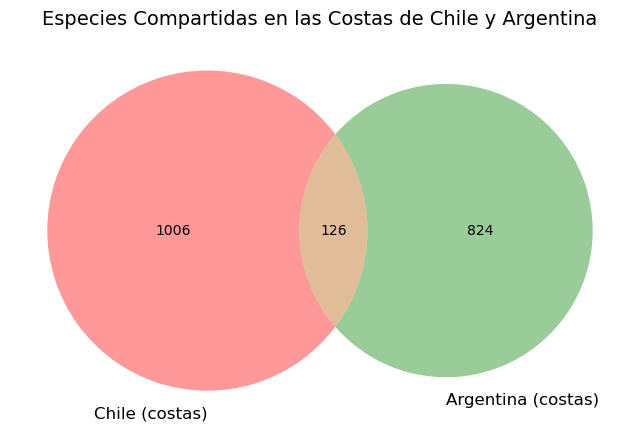

In [60]:
from matplotlib_venn import venn2

# Crear diagrama de Venn
plt.figure(figsize=(8, 6))
venn = venn2([chile_coastal_species, argentina_coastal_species], ('Chile (costas)', 'Argentina (costas)'))
plt.title("Especies Compartidas en las Costas de Chile y Argentina", fontsize=14)
plt.show()


Como podemos apreciar aunque Chile y Argentina sean paises vecinos no comparten un numero muy grande de especies fosiles y esto se puede deber a muchos factores tales como el medioambiente o el clima, ya que estos factores son muy determinantes a la hora de la evolucion, lo que puede hacer "cambiar las especias", por otro lado como estos paises estan "divididos" por la Cordillera de los Andes esto pudo haber dificultado migraciones de estos animales dificultando aun mas que en estos paises hayan fosiles de las mismas especies

---

### **3. Visualización de la Diversidad**
- **Objetivo:** Representar gráficamente la diversidad fósil de cada país por era geológica para facilitar la interpretación de los datos.  


In [64]:
species_by_era_chile_costas = chile_costas.groupby('era_early')['species_name'].nunique()
species_by_era_argentina_costas = argentina_costas.groupby('era_early')['species_name'].nunique()

print("\nEspecies por era geológica en las costas de Chile:")
print(species_by_era_chile_costas)

print("\nEspecies por era geológica en las costas de Argentina:")
print(species_by_era_argentina_costas)


Especies por era geológica en las costas de Chile:
era_early
Carboniferous      2
Cretaceous       243
Jurassic         307
Neogene          459
Ordovician         1
Paleogene         77
Paleozoic          2
Permian            4
Quaternary       159
Triassic          51
Name: species_name, dtype: int64

Especies por era geológica en las costas de Argentina:
era_early
Cambrian          21
Carboniferous     11
Cretaceous         6
Neogene          617
Ordovician        49
Paleogene         79
Permian           22
Quaternary       261
Name: species_name, dtype: int64


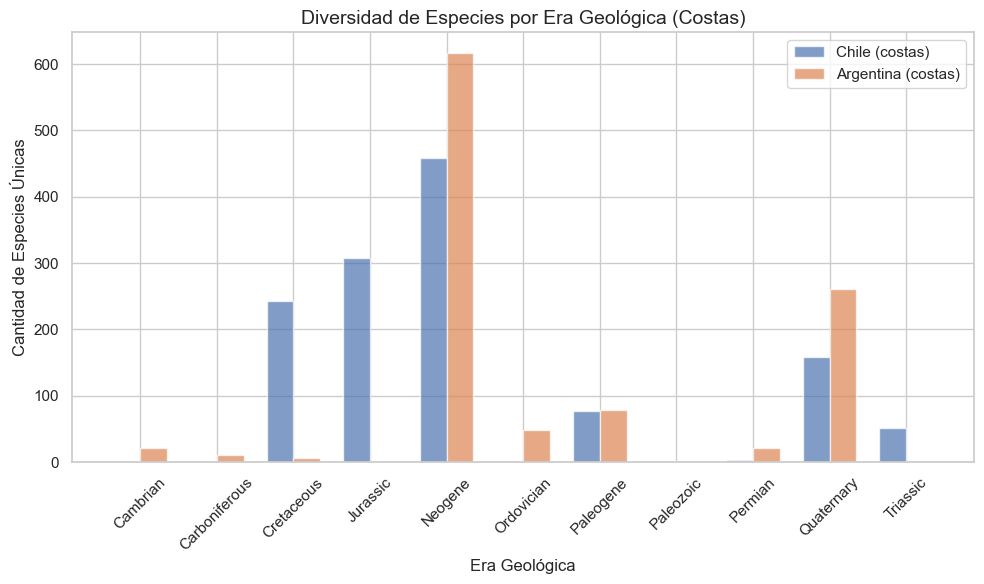

In [92]:
import seaborn as sns

sns.set(style="whitegrid")

data = pd.DataFrame({
    "Chile (costas)": species_by_era_chile_costas,
    "Argentina (costas)": species_by_era_argentina_costas
}).fillna(0)

x = np.arange(len(data.index))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width / 2, data["Chile (costas)"], width=width, label='Chile (costas)', alpha=0.7)

plt.bar(x + width / 2, data["Argentina (costas)"], width=width, label='Argentina (costas)', alpha=0.7)

plt.title("Diversidad de Especies por Era Geológica (Costas)", fontsize=14)
plt.xlabel("Era Geológica", fontsize=12)
plt.ylabel("Cantidad de Especies Únicas", fontsize=12)
plt.xticks(x, data.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



---

### **4. Cálculo del Índice de Jaccard**
- **Objetivo:** Cuantificar la similitud entre las especies fósiles de las costas de Chile y Argentina en cada era.  

In [95]:
shared_coastal_species_count = len(shared_coastal_species)
total_coastal_species_count = len(chile_coastal_species.union(argentina_coastal_species))
jaccard_index_coastal = shared_coastal_species_count / total_coastal_species_count

print(f"Índice de Jaccard (costas): {jaccard_index_coastal:.2f}")

Índice de Jaccard (costas): 0.06


Como se puede apreciar un índice bajo (como el obtenido, 0.06) indica que las costas de Chile y Argentina comparten pocas especies fósiles, lo cual puede deberse a:  
- Barreras geográficas (como la Cordillera de los Andes).  
- Diferencias ambientales entre ambas regiones.  
- Sesgos en los registros fósiles disponibles.